# Model 


# import data

In [386]:
import os
import sys
from pyprojroot import here

import pandas as pd

In [387]:
# Read in the data in the previous step
df = pd.read_pickle('..\data\processed\data_clean.pkl')
df.T

,0,1,2,3,4,5,6,7,8,9,...,3124,3125,3126,3127,3128,3129,3130,3131,3132,3133
project_title,density matrix renormalization group simulatio...,adolescent depressive vulnerability through th...,autonomic computing laboratory,laboratory for forest genomics,stoe ipds diffractometer stateoftheart image ...,infrastructure to investigate the role of t ly...,malleable costeffective highperformance comput...,cold regions biogeochemical research,sexual health research facility,role of vagal afferents in nutrient signalling...,...,gene therapy development for musculoskeletal d...,surviving memory in postwar el salvador a coll...,mapping stories global research lab,speciation analyses for elucidating molecular ...,the climatedatadriven design cd3 facility for ...,establishment of the intelligent visualization...,infrastructure for the catalytic synthesis of ...,niagara college nextgen greenhouse excellence,lambton water centre,cambrian college
project_description,proposed infrastructure to consist of a comput...,the proposed infrastructure consisting of onsi...,autonomic computing laboratory will enable res...,the proposed facility will enable the examina...,researchers at mcmaster university intend to u...,allergic and autoimmune diseases such as asthm...,a malleable costeffective highperformance comp...,the proposed research will investigate the bio...,the research infrastructure is required for th...,the objective of the research is to understand...,...,this proposal will identify diseasemodifying g...,surviving memory in postwar el salvador is an ...,his application requests infrastructure to est...,selenium se is an important contaminant releas...,this proposal outlines the equipment necessary...,this application is for funds to develop the i...,the proposed project will develop efficient co...,niagara college looks to expand upon strategic...,through this orf request lambton college will ...,through the battery electric vehicle lab bevl ...
area_primary,763,4,25,63,76,41,76,310,4,49,...,41,87,87,34,23,10,74,NaN,NaN,NaN
discipline_primary,12300.0,15100.0,11800.0,14400.0,13000.0,15200.0,11600.0,13500.0,15100.0,15200.0,...,41800.0,20001.0,22700.0,12900.0,10100.0,11800.0,13100.0,NaN,NaN,NaN
approval_date,2005-10-24 00:00:00,2005-07-22 00:00:00,2005-10-24 00:00:00,2005-07-22 00:00:00,2006-12-21 00:00:00,2006-08-31 00:00:00,2005-07-22 00:00:00,2005-10-24 00:00:00,2005-10-24 00:00:00,2005-10-24 00:00:00,...,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2021-12-17 00:00:00,2022-03-01 00:00:00,2022-03-01 00:00:00,2022-03-01 00:00:00
lead_research_institution,university of windsor,university of toronto,university of toronto,university of toronto,mcmaster university,mcmaster university,queens university,queens university,queens university,queens university,...,western university,western university,wilfrid laurier university,wilfrid laurier university,york university,york university,york university,niagara college,lambton college,cambrian college
city,windsor,toronto,toronto,toronto,hamilton,hamilton,kingston,kingston,kingston,kingston,...,london,london,waterloo,waterloo,toronto,toronto,toronto,niaraga on the lake,sarnia,sudbury
ontario_commitment,50000,59422,292551,200000,100000,197078,100000,128000,64000,125000,...,387254,52026,57077,200000,140000,114726,160000,892391,597715,1000000
total_project_costs,175708,148557,731377,500000,261369,492695,441005,320000,160000,312500,...,968135,130067,150858,500000,365313,329452,447211,7422302,1494288,2765734
keyword,density matrix renormalization group numerical...,depression adolescence cognitive vulnerability...,scaling availability adaptive selfmanaging sel...,comparative functional genomics molecular biol...,magnetocaloric materials for magnetic refriger...,immunology immunomodulation asthma allergy aut...,reconfigurable architectures selfadaptive comp...,biogeochemistry arctic and alpine environments...,sexual health laboratory p

# Add a prediction column y

In [388]:
ontario_share=df.ontario_commitment/df.total_project_costs

In [389]:
ontario_share.min(),ontario_share.max()

(0.011647420531457071, 0.8434528417428278)

In [390]:
df.total_project_costs.min(),df.total_project_costs.max(),df.total_project_costs.mean()

(11852, 58435136, 1473472.2000638163)

In [391]:
df['total_project_costs'] > df.total_project_costs.mean()

0       False
1       False
2       False
3       False
4       False
        ...  
3129    False
3130    False
3131     True
3132     True
3133     True
Name: total_project_costs, Length: 3134, dtype: bool

In [393]:
df["y"] = (df['total_project_costs'] > df.total_project_costs.mean()).astype(int)
df['y']

0       0
1       0
2       0
3       0
4       0
       ..
3129    0
3130    0
3131    1
3132    1
3133    1
Name: y, Length: 3134, dtype: int32

In [392]:
#df['y']=pd.cut(df['total_project_costs'],2,labels=['low','high'])
#df['y']

0       low
1       low
2       low
3       low
4       low
       ... 
3129    low
3130    low
3131    low
3132    low
3133    low
Name: y, Length: 3134, dtype: category
Categories (2, object): ['low' < 'high']

# Split the data to train-test

In [394]:
from sklearn.model_selection import train_test_split
import pandas as pd

In [395]:
x=df.drop(['y'],axis=1)
y=df['y']

In [396]:
x_train,x_test,y_train,y_test =train_test_split(x,y)

In [397]:
len(x_train),len(x_test)

(2350, 784)

In [398]:
x_train.shape,y_train.shape

((2350, 12), (2350,))

In [347]:
x_train['project_title']

1317    analysis of 3dimensional genome architecture a...
865     high temperature materials processing research...
1631          centre for functional and metabolic mapping
1370    nerve research centre at the hospital for sick...
2560    functional and metabolic assessment of small a...
                              ...                        
2729    characterizing a neural basis for crossmodal p...
963     increasing understanding of ruptures due to ea...
1623     privacy enhancing technologies at a global scale
40               infant hearing aid technology laboratory
1672    laboratory for the development and study of ex...
Name: project_title, Length: 2350, dtype: object

# Tf-idf


In [225]:
#tokens[2345:2346]

In [399]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Atieh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [400]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from nltk.corpus import stopwords

In [401]:
tfidfvectorizer = TfidfVectorizer(analyzer='word',
                             lowercase=True,
                             max_df=0.9,
                             min_df=2,
                             ngram_range=(1,3),
                             stop_words='english')

In [402]:
tfidfvectorizer.fit(x_train['project_title'])
tfidf_train = tfidfvectorizer.transform(x_train['project_title'])

In [403]:
tfidf_test  = tfidfvectorizer.transform(x_test['project_title'])

In [406]:
tfidf_train.shape,tfidf_test.shape

((2350, 2741), (784, 2741))

In [409]:
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')
count_wm=countvectorizer.fit_transform(x_train['project_title'])

In [410]:
count_tokens = countvectorizer.get_feature_names()
tfidf_tokens = tfidfvectorizer.get_feature_names()

In [411]:
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_train.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

      1000mhz  120c  1871  18752010  1891  20  21st  2d  2d3d  3d  ...  yield  \
0           0     0     0         0     0   0     0   0     0   1  ...      0   
1           0     0     0         0     0   0     0   0     0   0  ...      0   
2           0     0     0         0     0   0     0   0     0   0  ...      0   
3           0     0     0         0     0   0     0   0     0   0  ...      0   
4           0     0     0         0     0   0     0   0     0   0  ...      0   
...       ...   ...   ...       ...   ...  ..   ...  ..   ...  ..  ...    ...   
2345        0     0     0         0     0   0     0   0     0   0  ...      0   
2346        0     0     0         0     0   0     0   0     0   0  ...      0   
2347        0     0     0         0     0   0     0   0     0   0  ...      0   
2348        0     0     0         0     0   0     0   0     0   0  ...      0   
2349        0     0     0         0     0   0     0   0     0   0  ...      0   

      yor

In [412]:
tfidf_train.shape, tfidf_test.shape

((2350, 2741), (784, 2741))

In [242]:
#tfidf.nonzero()[1]

In [413]:
#fit change and fit the model
#transform just return the value of known model
type(tfidf_train)

scipy.sparse.csr.csr_matrix

In [414]:
words=tfidfvectorizer.get_feature_names()

C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [415]:
len(words)

2741

In [416]:
words

['3d',
 '3d lab',
 '3dimensional',
 '5g',
 '600',
 '600 mhz',
 'aboriginal',
 'accelerator',
 'access',
 'achieve',
 'acid',
 'acoustic',
 'acquired',
 'acquired brain',
 'acquisition',
 'action',
 'activation',
 'active',
 'activities',
 'activity',
 'activity research',
 'activitybased',
 'acute',
 'acute chronic',
 'adaptable',
 'adaptation',
 'adaptations',
 'adaptive',
 'addiction',
 'additive',
 'additive manufacturing',
 'additive manufacturing network',
 'addressing',
 'adhesion',
 'adipose',
 'adipose tissue',
 'adolescent',
 'adults',
 'advance',
 'advanced',
 'advanced building',
 'advanced characterization',
 'advanced design',
 'advanced digital',
 'advanced energy',
 'advanced imaging',
 'advanced infrastructure',
 'advanced materials',
 'advanced research',
 'advanced scanning',
 'advanced sensor',
 'advancement',
 'advances',
 'advancing',
 'aerial',
 'aerosol',
 'aerospace',
 'affective',
 'age',
 'agents',
 'aging',
 'agricultural',
 'agriculture',
 'agrifood',
 'agro

In [417]:
tfidf_train.nonzero()[1] #Return the indices of the elements that are non-zero.

array([2425, 2424, 2419, ..., 1736, 1393, 1365], dtype=int32)

In [418]:
tfidf_train.nonzero()

(array([   0,    0,    0, ..., 2349, 2349, 2349], dtype=int32),
 array([2425, 2424, 2419, ..., 1736, 1393, 1365], dtype=int32))

In [419]:
a=np.array([[3,0,4],[4,7,0]])
a, a.nonzero()

(array([[3, 0, 4],
        [4, 7, 0]]),
 (array([0, 0, 1, 1], dtype=int64), array([0, 2, 0, 1], dtype=int64)))

In [420]:
a.nonzero()[1]

array([0, 2, 0, 1], dtype=int64)

In [421]:
tfidf_train.shape

(2350, 2741)

In [422]:
#extract the words for with the tf-idf of higher than 0.7 for train set.
m=0
d=[]
for col in tfidf_train.nonzero()[1]:
    if tfidf_train[tfidf_train.nonzero()[0][m],col] > 0.7:
        #print (words[col], '-', tfidf_train[tfidf_train.nonzero()[0][m],col])
        d.append((words[col],tfidf_train[tfidf_train.nonzero()[0][m],col]))
        m=m+1
    else:
        m=m+1
df=pd.DataFrame(d, columns=('words', 'tf-idf'))
df.sort_values(by=['tf-idf'],ascending=False)    

,words,tf-idf
96,motion,1.000000
121,rate,1.000000
120,synthesis,1.000000
215,analytical,1.000000
54,lab,1.000000
...,...,...
228,mobility lab,0.701255
115,biodiversity,0.700803
28,adaptation,0.700793
136,psychology,0.700412


In [423]:
#extract the words for with the tf-idf of higher than 0.5 for test set.
m=0
d=[]
for col in tfidf_test.nonzero()[1]:
    if tfidf_test[tfidf_train.nonzero()[0][m],col] > 0.5:
        #print (words[col], '-', tfidf_test[tfidf_train.nonzero()[0][m],col])
        d.append((words[col],tfidf_test[tfidf_train.nonzero()[0][m],col]))
        m=m+1
    else:
        m=m+1
df=pd.DataFrame(d, columns=('words', 'tf-idf'))
df.sort_values(by=['tf-idf'],ascending=False) 

,words,tf-idf
3,lab,1.000000
4,memory,0.742201
2,progression,0.683512
5,laboratory,0.676246
1,laboratory,0.636912
6,optimal,0.618176
0,centre,0.549672


# Model

In [424]:
x_train=tfidf_train
x_test=tfidf_test

In [426]:
x_train.shape,x_test.shape

((2350, 2741), (784, 2741))

In [427]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [428]:
x_test.shape,x_train.shape

((784, 2741), (2350, 2741))

In [429]:
y_test.shape,y_train.shape

((784,), (2350,))

In [430]:
#vectorizer = TfidfVectorizer(min_df=2)
#tfidf_test = vectorizer.fit_transform(x_test['project_title'])

In [431]:
model.score(x_test,y_test)

0.8482142857142857

In [435]:
y_pred=model.predict(x_test)

In [449]:
type(y_pred),type(y_test)

(numpy.ndarray, pandas.core.series.Series)

In [461]:
y_test.value_counts()

0    654
1    130
Name: y, dtype: int64

In [464]:
pd.Series(y_pred).value_counts()

0    767
1     17
dtype: int64

In [473]:
y_pred=pd.Series(y_pred)

In [476]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[651   3]
 [116  14]]


C:\Users\Atieh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


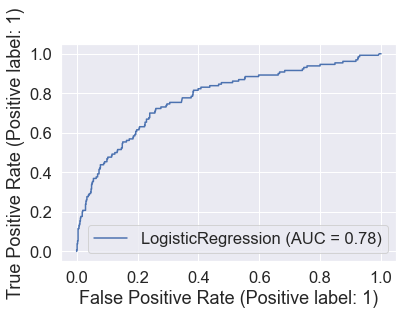

In [472]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(model, x_test, y_test)